In [ ]:
!pip install flair

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 373.1/373.1 kB 20.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 788.5/788.5 kB 53.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.6/135.6 kB 15.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 92.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 51.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.1/53.1 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.7/19.7 MB 50.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 21.0 MB/s eta 0:00:0

In [ ]:
#importing all recquired packages

import re
import nltk
import string
import numpy as np
import pandas as pd
import pandas as pd
import flair
from textblob import TextBlob
from keras.models import Model
import matplotlib.pyplot as plt
from flair.data import Sentence
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from flair.models import TextClassifier
from nltk.tokenize import word_tokenize
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
import nltk
nltk.download('punkt')

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import nltk
nltk.download('wordnet')

import nltk
nltk.download('omw-1.4')

import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
df = pd.read_csv('lyrics_validation.csv')
#df = pd.read_csv('/content/drive/MyDrive/lyrics_validation.csv')

In [ ]:
df = df[['lyrics', 'sentiment']]

print(df.columns)


Index(['lyrics', 'sentiment'], dtype='object')


In [ ]:
print (df)

                                              lyrics sentiment
0  Good day in my mind, safe to take a step out G...  negative
1  I got my driver's license last week Just like ...  negative
2  Ooh Na-na, yeah I saw you dancing in a crowded...  negative
3  I can't seem to focus And you don't seem to no...  negative
4  Everybody knows my name now But something 'bou...  negative
5  If you wanna run away with me I know a galaxy ...  positive
6  Golden, golden, golden As I open my eyes Hold ...  positive
7  Say baby, say baby, say baby What you doin'? (...  positive


In [ ]:
# Droping rows with null values in the 'lyrics' column
df = df.dropna(subset=['lyrics'])

# Droping rows with null values in the 'lyrics' column
df = df.dropna(subset=['sentiment'])


In [ ]:
df['lyrics'].count()

8

In [ ]:
df['sentiment'].count()

8

In [ ]:
col_lengths = df.apply(lambda x: len(x))

print(col_lengths)

lyrics       8
sentiment    8
dtype: int64


In [ ]:
# Defining preprocessing function
def preprocess_text(text):
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize text
    words = nltk.word_tokenize(text)

    # Remove stop words
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    # Lemmatize words
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join words back into sentence
    text = ' '.join(words)
    return text


In [ ]:
df['lyrics'] = df['lyrics'].apply(preprocess_text)

In [ ]:
#!pip install flair
#Loading Pretrained Flair Text Classifier and Defining Function to Predict Sentiment from Text


classifier = TextClassifier.load('en-sentiment')

def get_sentiment(text):
    sentence = Sentence(text)
    classifier.predict(sentence)
    sentiment = sentence.labels[0].value
    return sentiment.lower()

In [ ]:
#Predicting Sentiments of Lyrics using Flair en-sentiment Model and Counting Predicted Sentiments
df['predicted_sentiment'] = df['lyrics'].apply(get_sentiment)
# Calculating sentiment counts from the model's predictions
predicted_sentiment_counts = df['predicted_sentiment'].value_counts()

In [ ]:
#Defining Function to Calculate Model Accuracy on the Given Dataset

def calculate_accuracy(df, model):
    correct = 0
    total = len(df)

    for i, row in df.iterrows():
        text = row['lyrics']
        label = row['sentiment']
        predicted_label = model(text)

        if predicted_label == label:
            correct += 1

    accuracy = correct / total
    return accuracy

In [ ]:
accuracy = calculate_accuracy(df, get_sentiment)

In [ ]:

print(f"Model accuracy: {accuracy}")

Model accuracy: 0.875


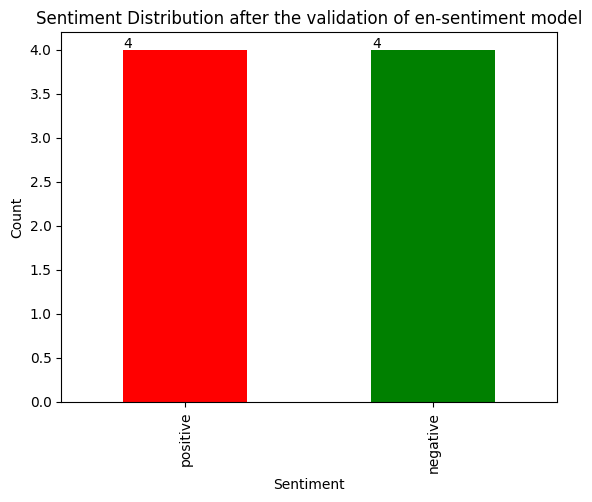

In [ ]:
# Ploting the distribution of sentiments
ax = predicted_sentiment_counts.plot(kind='bar', color=['green' if x == 'positive' else 'red' for x in sentiment_counts.index])
plt.title('Sentiment Distribution after the validation of en-sentiment model')
plt.xlabel('Sentiment')
plt.ylabel('Count')

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

plt.show()